# Question 2: Building Markov Transition Matrix

## Objective
To construct a Markov transition matrix from a given DNA sequence and understand the difference between dinucleotide frequency models and Markov models.

## Task Details
- You are provided with an input DNA sequence
- Calculate the transition probabilities between nucleotides (A, C, G, T)
- Construct a 4×4 transition matrix where each element represents the probability of transitioning from one nucleotide to another
- Visualize and interpret the transition matrix

## Expected Output
A 4×4 transition matrix showing the probability of transitioning from each nucleotide (rows) to every other nucleotide (columns).

In [1]:
import numpy as np                # For creating and working with matrices
import pandas as pd               # For displaying data in a nice table format
import matplotlib.pyplot as plt   # For creating plots and visualizations
import seaborn as sns             # For making better looking heatmaps
from collections import defaultdict, Counter  # For counting base transitions efficiently

In [2]:
genome_seq = "ATCANNTTGGCGTCNTAGTAAGATCGTTCCAGNTTACGTTCGTTNNAGCATATAGTAGAC"  # Test sequence with some non-standard bases

clean_seq = ''.join([base for base in genome_seq if base in 'ACGT'])  # Removing non-standard bases like N

print(f"Processing DNA sequence of length {len(clean_seq)} bp")

Processing DNA sequence of length 54 bp


In [3]:
base_transitions = defaultdict(Counter)  # Using a nested counter to track base pairs

# This loop counts how many times each base follows another base in the sequence
for pos in range(len(clean_seq) - 1):
    current_base = clean_seq[pos]
    next_base = clean_seq[pos+1]
    base_transitions[current_base][next_base] += 1

dna_bases = ['A', 'C', 'G', 'T']
prob_matrix = np.zeros((4, 4))

# Converting raw counts to probabilities - this is the core Markov matrix calculation
for i, start_base in enumerate(dna_bases):
    base_total = sum(base_transitions[start_base].values())
    if base_total > 0:
        for j, end_base in enumerate(dna_bases):
            prob_matrix[i, j] = base_transitions[start_base][end_base] / base_total

# Using pandas to display the matrix in a readable format
matrix_df = pd.DataFrame(prob_matrix, index=dna_bases, columns=dna_bases)
print("Markov Transition Matrix:")
print(matrix_df)

Markov Transition Matrix:
          A         C         G         T
A  0.071429  0.142857  0.428571  0.357143
C  0.333333  0.111111  0.444444  0.111111
G  0.166667  0.166667  0.083333  0.583333
T  0.388889  0.277778  0.055556  0.277778


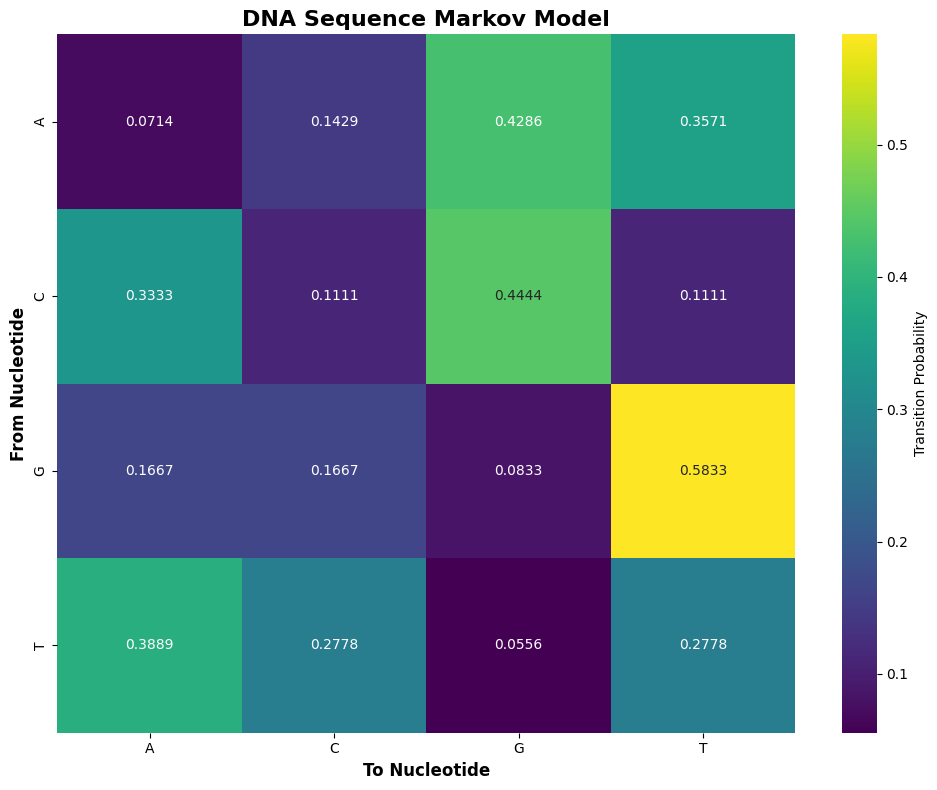

In [4]:
plt.figure(figsize=(10, 8))  # Making the figure big enough to see clearly

# Creating a heatmap to visualize the transition probabilities
sns.heatmap(matrix_df, annot=True, cmap='viridis', fmt='.4f',
           cbar_kws={'label': 'Transition Probability'})

plt.xlabel('To Nucleotide', fontsize=12, fontweight='bold')
plt.ylabel('From Nucleotide', fontsize=12, fontweight='bold')
plt.title('DNA Sequence Markov Model', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Interpretation of the Matrix

The transition matrix shows the probability of moving from one nucleotide (rows) to another (columns). For example:

- The value at position [0,1] represents P(C|A) - the probability of observing a C after an A.
- The value at position [2,3] represents P(T|G) - the probability of observing a T after a G.

## Difference Between Dinucleotide Frequency and Markov Models

1. **Dinucleotide Frequency Model**: Simply counts the occurrences of each possible dinucleotide (AA, AC, AG, AT, CA, etc.) and normalizes by the total number of dinucleotides in the sequence.

2. **First-order Markov Model**: Represents the conditional probability of each nucleotide given the previous one. It captures the dependency between adjacent nucleotides in a sequence.

The key difference is that a Markov model provides transition probabilities that are conditional on the current state, whereas a dinucleotide frequency model simply provides joint probabilities of consecutive nucleotides.

In [5]:
pair_counts = Counter()  # Using Counter to track dinucleotide frequencies

# Counting the occurrences of each 2-nucleotide combination in the sequence
for pos in range(len(clean_seq) - 1):
    nuc_pair = clean_seq[pos:pos+2]    # Grab each 2-base pair
    pair_counts[nuc_pair] += 1

# Converting the counts to frequencies by dividing by total number of pairs
total_pairs = sum(pair_counts.values())
pair_freqs = {pair: count/total_pairs for pair, count in pair_counts.items()}

# Displaying the dinucleotide frequencies in alphabetical order
print("Dinucleotide Frequencies:")
for pair, freq in sorted(pair_freqs.items()):
    print(f"{pair}: {freq:.4f}")

Dinucleotide Frequencies:
AA: 0.0189
AC: 0.0377
AG: 0.1132
AT: 0.0943
CA: 0.0566
CC: 0.0189
CG: 0.0755
CT: 0.0189
GA: 0.0377
GC: 0.0377
GG: 0.0189
GT: 0.1321
TA: 0.1321
TC: 0.0943
TG: 0.0189
TT: 0.0943


## Application of Markov Models in Genomics

Markov models are powerful tools in computational biology and genomics. They can be used for:

1. **Gene Finding**: Identifying coding regions in genomes by modeling the different statistical properties of coding and non-coding regions.

2. **Sequence Classification**: Determining whether a sequence belongs to a specific category based on its nucleotide transition patterns.

3. **Sequence Generation**: Creating synthetic DNA sequences with statistical properties similar to real genomic sequences.

4. **Motif Discovery**: Finding recurring patterns in DNA sequences that might have biological significance.

The transition matrix we've built is the foundation for these applications, capturing the essential sequential dependencies in DNA.

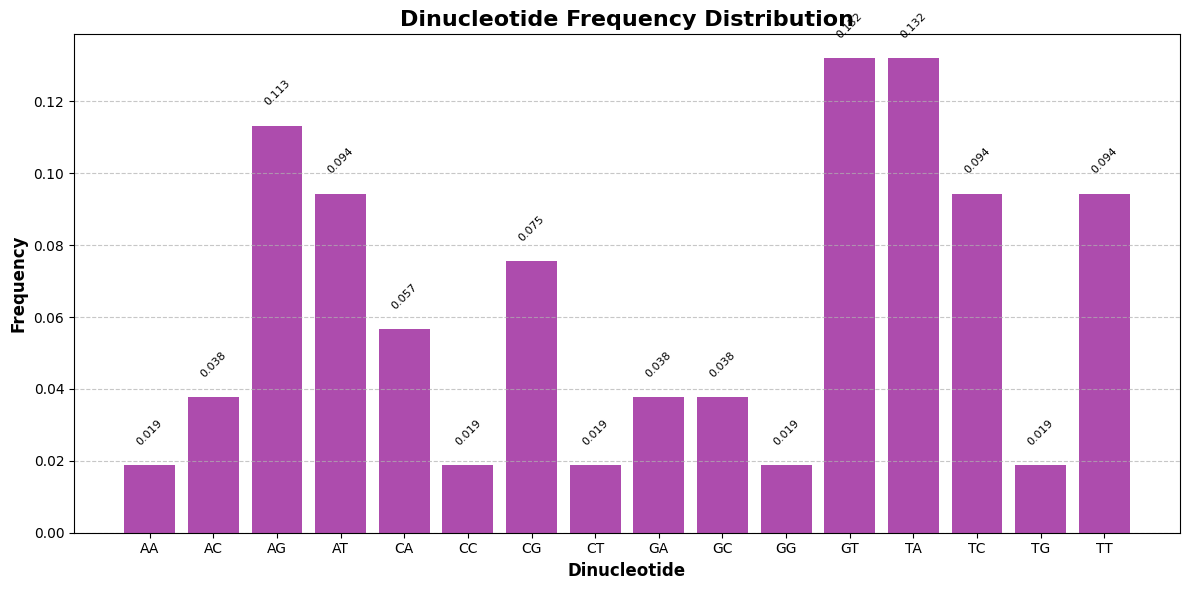

In [6]:
# Getting the data ready for the bar chart
sorted_pairs = sorted(pair_freqs.keys())
frequencies = [pair_freqs[pair] for pair in sorted_pairs]

plt.figure(figsize=(12, 6))

# Creating a bar chart of dinucleotide frequencies with a purple color scheme
bars = plt.bar(sorted_pairs, frequencies, color='darkmagenta', alpha=0.7)
plt.xlabel('Dinucleotide', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Dinucleotide Frequency Distribution', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the actual frequency values on top of each bar for better readability
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', rotation=45, fontsize=8)

plt.tight_layout()
plt.show()